In [21]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [3]:
pip install dmba

     |████████████████████████████████| 11.8 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 3.5 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
df=pd.read_csv("Users/baoqiangzhang/Downloads/ToyotaCorolla.csv")

In [9]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [8]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors',
              'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco',
              'Automatic_airco', 'CD_Player', 'Powered_Windows',
              'Sport_Model', 'Tow_Bar']
outcome = 'Price'

# Split the data into training, validation, and test datasets
train_data, test_data, train_target, test_target = train_test_split(df[predictors], df[outcome], test_size=0.2, random_state=42)
train_data, val_data, train_target, val_target = train_test_split(train_data, train_target, test_size=0.375, random_state=42)

# Preprocess the categorical variables using one-hot encoding
categorical_cols = ['Fuel_Type']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([('encoder', OneHotEncoder())]), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply preprocessing to training, validation, and test datasets
train_data = preprocessor.fit_transform(train_data)
val_data = preprocessor.transform(val_data)
test_data = preprocessor.transform(test_data)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(train_data, train_target)

# Evaluate the model on the validation dataset
val_predictions = model.predict(val_data)

# Calculate the mean squared error (MSE) on the validation dataset
mse = ((val_predictions - val_target) ** 2).mean()
print('Mean Squared Error on Validation Set:', mse)

Mean Squared Error on Validation Set: 1528061.644061202


In [23]:
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [-1.42354832e+03  8.72479977e+02  5.51068345e+02 -1.12687669e+02
 -1.59279948e-02  3.78475521e+01  5.66239406e+02  1.52561974e+02
  1.23748702e+01  9.05067913e+01  8.72676680e+01  1.12697770e+02
  3.06882047e+03  2.51461802e+02  5.65047977e+02  2.71631622e+02
 -2.78891246e+02]
Intercept: 11026.126530626778


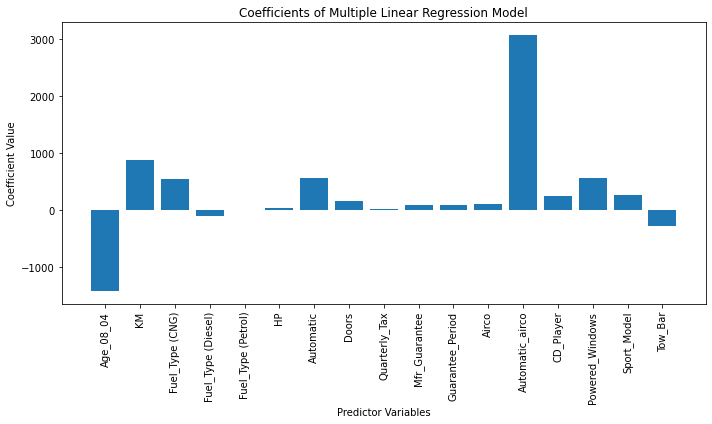

In [24]:
import matplotlib.pyplot as plt

# Coefficient labels
labels = ['Age_08_04', 'KM', 'Fuel_Type (CNG)', 'Fuel_Type (Diesel)', 'Fuel_Type (Petrol)',
          'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period',
          'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']

# Coefficient values
coefficients = [-1423.548, 872.480, 551.068, -112.688, -0.016, 37.848, 566.239, 152.562,
                12.375, 90.507, 87.268, 112.698, 3068.820, 251.462, 565.048, 271.632, -278.891]

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(labels, coefficients)
plt.xticks(rotation=90)
plt.xlabel('Predictor Variables')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Multiple Linear Regression Model')
plt.tight_layout()
plt.show()

In [25]:
import numpy as np

# Sort coefficients by absolute value in descending order
abs_coefficients = np.abs(coefficients)
sorted_indices = np.argsort(abs_coefficients)[::-1]

# Get the top three or four variables
top_variables = [labels[i] for i in sorted_indices[:4]]

print("The three or four most important car specifications for predicting price are:")
for var in top_variables:
    print("- ", var)

The three or four most important car specifications for predicting price are:
-  Automatic_airco
-  Age_08_04
-  KM
-  Automatic


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict prices on the validation set
val_predictions = model.predict(val_data)

# Calculate MSE
mse = mean_squared_error(val_target, val_predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(val_target, val_predictions)

print("Performance metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Performance metrics:
Mean Squared Error (MSE): 1528061.644061202
Root Mean Squared Error (RMSE): 1236.147905414721
R-squared (R2): 0.8878188551579556
